In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Test O_G_Equipment_Data.xlsx")

In [4]:
df

Cycle  Preset_1  Preset_2  Temperature    Pressure  VibrationX  \
0        1         3         6    44.235186   47.657254   46.441769   
1        2         2         4    60.807234   63.172076   62.005951   
2        3         2         1    79.027536   83.032190   82.642110   
3        4         2         3    79.716242  100.508634  122.362321   
4        5         2         5    39.989054   51.764833   42.514302   
..     ...       ...       ...          ...         ...         ...   
795    796         2         6    50.469522   98.235421  151.585252   
796    797         1         4    49.985270  160.433640  110.953010   
797    798         1         4    79.777294  110.535405   61.334995   
798    799         2         8    79.360314  159.985443   61.762879   
799    800         3         1    80.854011  110.543701  121.032227   

     VibrationY  VibrationZ   Frequency   Fail  
0     64.820327   66.454520   44.483250  False  
1     80.714431   81.246405   60.228715  False  
2     98.254386   98.785196   80.993479  False  
3    121.363429  118.652538   80.315567  False  
4     61.037910   50.716469   64.245166  False  
..          ...         ...         ...    ...  
795   99.341380  148.838481   49.841400   True  
796  160.777175  109.917566  110.919290   True  
797  149.577811  129.463843   70.853353   True  
798  169.773831  130.213426   80.113540   True  
799  131.719473   90.331155   71.261717   True  

[800 rows x 10 columns]

### Introduction

In this assignment, you will get to know the industry we work in – don’t worry, no previous
experience is required. The assignment involves an FPSO (Floating Production, Storage, and Offloading)
vessel, and we need your help with an equipment failure problem. 

We hope this exercise will give you
some insight into the challenges we face daily (for a reference of what an FPSO is, please check
this <a href="https://www.modec.com/business/service/floater/fpso/" target="_blank" rel="noopener noreferrer">LINK</a>). To enable the operation of an FPSO, we monitor and control the equipment's using various
sensors and instrumentation. 

These sensors measure different parameters in different setup
configurations overtime. 

In this test, we want you to investigate one piece of equipment in different time
cycles to understand what characteristics and parameters of the sensors might indicate that the
equipment is on the verge of failing.

### Dataset

The dataset contains anonymized time series records of a machine's operation from an FPSO.

The recorded variables are as follows:

1. Cycle: Sequential identifier of measurement cycles.

2. Preset_1 & Preset_2: Variables that control a specific operating point of the machine.

3. Temperature: Temperature recorded in the equipment.

4. Vibrations (X, Y & Z): Vibrations along the machine's axes.

5. Frequency: Operating frequency of the machine.

6. Fail: Variable indicating whether the machine is in a failure state at the given timestamp.

### Tasks

1. Calculate how many times the equipment has failed.
During the FPSO’s operation, various factors can cause the machine to fail and prolong its failure
state. We ask you to explore the available data, identify, and calculate the number of times the
equipment has failed throughout its operation.

---------------

2. Categorize equipment failures by setup configurations (Preset 1 and Preset 2).
How do the variables Preset_1 and Preset_2 behave during operation? What insights can we
derive from these variables?

---------------

3. Categorize equipment failures by their nature/root cause according to parameter
readings (temperature, pressure, and others).
Analyze patterns in these readings that could indicate specific failure types. How do these
patterns differ across operational regimes? Provide insights based on your findings.

---------------

4. Create a model (or models) using the technique you think is most appropriate and
measure its performance.
Based on the given time-series dataset, which models or techniques are suitable for predicting
whether the equipment will fail before it occurs? Additionally, how can the model's performance be tuned
and measured for this task?

---------------

5. Analyze variable importance.
After developing a model, how can we determine which variables had the greatest impact on the
prediction?

### Few Tips

While writing your report with solutions, keep the following tips in mind:
Please write down any insights and conclusions throughout your code when you think it is
necessary, keeping them as clear and complete as possible. Think of this exercise as your first
technical report for Shape!


At Shape, we primarily work with Python, and you are encouraged to use this language. We value
clean, concise, and production-ready code. Feel free to use code quality tools to assist you in this
task (black, ruff, mypy, for example)! Typing annotations and well-documented functions are
highly appreciated!


If you use multiple models, please document the pros and cons of each, and provide a clear
explanation of why you selected the final model.


To simplify the process, always visualize the data to verify that your findings and understanding of
the problem are accurate.


Once you’re done, please send us your analyses and answers in an HTML notebook, but also
other conclusions and insights that you think are relevant to the project. 

We value creativity!


Feel free to discuss how you think you would put the models in production. Discussions about
training process, inference time and how to optimize the models for deployment in a production
environment.

### Do and don’ts

#### What do we expect you to do:

Problem comprehension. Explore and visualize the data to validate your findings and
understanding.

Present storytelling of data and analyses performed.

Write clean, concise, and production-compatible code.

Logic and concise model definition. Provide clear explanations for the models and techniques you
use.

Rationale explanation.

Results evaluation.

Ensure your report is structured, clear, and professional.

#### Some don’ts:

Avoid writing overly complex or unreadable code.

Avoid making assumptions without data-driven evidence.

Don’t neglect exploratory data analysis and visualizations.

Avoid hardcoding parameters or values without justification.

Super complex models with no logic or rationale behind them.

Automated Tools for Exploratory Data Analysis and AutoML.

## First task solution

1. Calculate how many times the equipment has failed.

During the FPSO’s operation, various factors can cause the machine to fail and prolong its failure
state. We ask you to explore the available data, identify, and calculate the number of times the
equipment has failed throughout its operation.

In [5]:
## First task

df['Fail'].value_counts()

Fail
False    734
True      66
Name: count, dtype: int64

It has fail 66 times during the process

## Second task solution

2. Categorize equipment failures by setup configurations (Preset 1 and Preset 2).

How do the variables Preset_1 and Preset_2 behave during operation? What insights can we
derive from these variables?

In [7]:
df

Cycle  Preset_1  Preset_2  Temperature    Pressure  VibrationX  \
0        1         3         6    44.235186   47.657254   46.441769   
1        2         2         4    60.807234   63.172076   62.005951   
2        3         2         1    79.027536   83.032190   82.642110   
3        4         2         3    79.716242  100.508634  122.362321   
4        5         2         5    39.989054   51.764833   42.514302   
..     ...       ...       ...          ...         ...         ...   
795    796         2         6    50.469522   98.235421  151.585252   
796    797         1         4    49.985270  160.433640  110.953010   
797    798         1         4    79.777294  110.535405   61.334995   
798    799         2         8    79.360314  159.985443   61.762879   
799    800         3         1    80.854011  110.543701  121.032227   

     VibrationY  VibrationZ   Frequency   Fail  
0     64.820327   66.454520   44.483250  False  
1     80.714431   81.246405   60.228715  False  
2     98.254386   98.785196   80.993479  False  
3    121.363429  118.652538   80.315567  False  
4     61.037910   50.716469   64.245166  False  
..          ...         ...         ...    ...  
795   99.341380  148.838481   49.841400   True  
796  160.777175  109.917566  110.919290   True  
797  149.577811  129.463843   70.853353   True  
798  169.773831  130.213426   80.113540   True  
799  131.719473   90.331155   71.261717   True  

[800 rows x 10 columns]

In [6]:
df["Fail"]

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Fail, Length: 800, dtype: bool

In [31]:
df[df['Preset_1']==1]

Cycle  Preset_1  Preset_2  Temperature    Pressure  VibrationX  \
5        6         1         2    58.336085   64.426353   56.479227   
6        7         1         3    77.937777   83.146657   77.800590   
7        8         1         4    78.563506  130.089912  110.479871   
9       10         1         8    42.619159   48.343336   65.789156   
12      13         1         1    79.806509  103.129738  120.753103   
..     ...       ...       ...          ...         ...         ...   
787    788         1         5    82.942913   99.210657  124.847286   
792    793         1         6   127.670754  131.515898   95.582845   
793    794         1         1   127.241746  130.866581   94.530934   
796    797         1         4    49.985270  160.433640  110.953010   
797    798         1         4    79.777294  110.535405   61.334995   

     VibrationY  VibrationZ   Frequency   Fail Preset_1_2  
5     78.623742   65.911528   78.886214  False         12  
6    109.679048   86.230728   99.681179  False         13  
7    130.997020   85.218562   98.467375  False         14  
9     49.524829   64.915090   41.620715  False         18  
12   134.500905  115.873197   76.562856   True         11  
..          ...         ...         ...    ...        ...  
787   58.777670   74.652973   53.873592  False         15  
792  132.053899   97.254115   97.776491   True         16  
793  131.437235   97.778930  100.064043   True         11  
796  160.777175  109.917566  110.919290   True         14  
797  149.577811  129.463843   70.853353   True         14  

[264 rows x 11 columns]

In [7]:
## Second task

df[['Preset_1', 'Preset_2']]

Preset_1  Preset_2
0           3         6
1           2         4
2           2         1
3           2         3
4           2         5
..        ...       ...
795         2         6
796         1         4
797         1         4
798         2         8
799         3         1

[800 rows x 2 columns]

In [9]:
(df['Preset_1'].astype(str) + df['Preset_2'].astype(str)).value_counts()

13    43
25    40
24    40
38    39
17    38
12    38
27    37
28    37
26    37
22    34
16    34
11    34
37    34
33    32
31    31
34    31
15    31
21    30
36    30
35    29
32    29
23    26
18    24
14    22
Name: count, dtype: int64

In [46]:
df['Set_1'] = df["Preset_1"].astype(str)
df['Set_2'] = df["Preset_2"].astype(str)

In [50]:
import plotly.express as px

px.line(df.dropna(subset=['Cycle','Frequency','Set_1','Set_2']).sort_values(['Set_1','Set_2','Cycle']),
           x='Cycle', y='Frequency', color='Set_1', symbol='Set_2').show()

In [ ]:
import plotly.express as px

px.bar()

In [49]:
import plotly.express as px

px.line(df.dropna(subset=['Cycle','Pressure','Set_1','Set_2']).sort_values(['Set_1','Set_2','Cycle']),
           x='Cycle', y='Pressure', color='Set_1', symbol='Set_2').show()

In [48]:
import plotly.express as px

px.line(df.dropna(subset=['Cycle','Temperature','Set_1','Set_2']).sort_values(['Set_1','Set_2','Cycle']),
           x='Cycle', y='Temperature', color='Set_1', symbol='Set_2').show()

In [47]:
import plotly.express as px

px.scatter(df.dropna(subset=['Cycle','Temperature','Set_1','Set_2']).sort_values(['Set_1','Set_2','Cycle']),
           x='Cycle', y='Temperature', color='Set_1', symbol='Set_2').show()

In [41]:
import plotly.express as px

px.line(
    df.dropna(subset=['Cycle','Temperature']).sort_values(['Cycle']),
    x='Cycle', y='Temperature', markers=True
).show()

In [45]:
import plotly.express as px

px.line(
    df.dropna(subset=['Cycle','Temperature','Set_1']).sort_values(['Set_1','Cycle']),
    x='Cycle', y='Temperature', color='Set_1', markers=True
).show()

In [40]:
px.line(
    df.dropna(subset=['Cycle','Pressure','Preset_1']).sort_values(['Preset_1','Cycle']),
    x='Cycle', y='Pressure', color='Preset_1', markers=True
).show()

In [19]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_fail_by_preset1(df: pd.DataFrame, rows: int = 2, cols: int = 3,
                         title: str = "Distribuição de Fail por Preset_1"):
    # Seleção básica e limpeza mínima
    d = df[["Preset_1", "Fail"]].dropna()
    d["Fail"] = d["Fail"].replace({1: True, 0: False, "True": True, "False": False}).astype(bool)

    # Preparação: ordem dos presets e grade
    presets = np.sort(d["Preset_1"].unique())
    n = len(presets)
    if rows * cols < n:
        rows = math.ceil(n / cols)

    # Contagens por preset x fail (garante colunas [False, True])
    counts = (
        d.groupby(["Preset_1", "Fail"]).size()
         .unstack("Fail", fill_value=0)
         .reindex(columns=[False, True], fill_value=0)
    )
    y_max = int(counts.to_numpy().max())

    # Figura e eixos
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.2, rows * 2.8), sharey=True)
    axes = np.atleast_1d(axes).ravel()

    for i, p in enumerate(presets):
        ax = axes[i]
        vals = counts.loc[p].values  # [n_false, n_true]
        ax.bar(["False", "True"], vals)
        ax.set_ylim(0, round(y_max*1.2))
        ax.set_title(f"Preset_1 = {p}", fontsize=10)
        # rótulos de valor
        for x, y in zip([0, 1], vals):
            ax.text(x, y, str(y), ha="center", va="bottom", fontsize=9)

    # Esconde eixos sobrando
    for j in range(n, len(axes)):
        axes[j].axis("off")

    fig.suptitle(title, fontsize=12)
    fig.supylabel("Contagem")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    return fig

# Exemplo de uso:
# fig = plot_fail_by_preset1(df, rows=4, cols=2)
# plt.show()


/tmp/ipykernel_854/2276666490.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



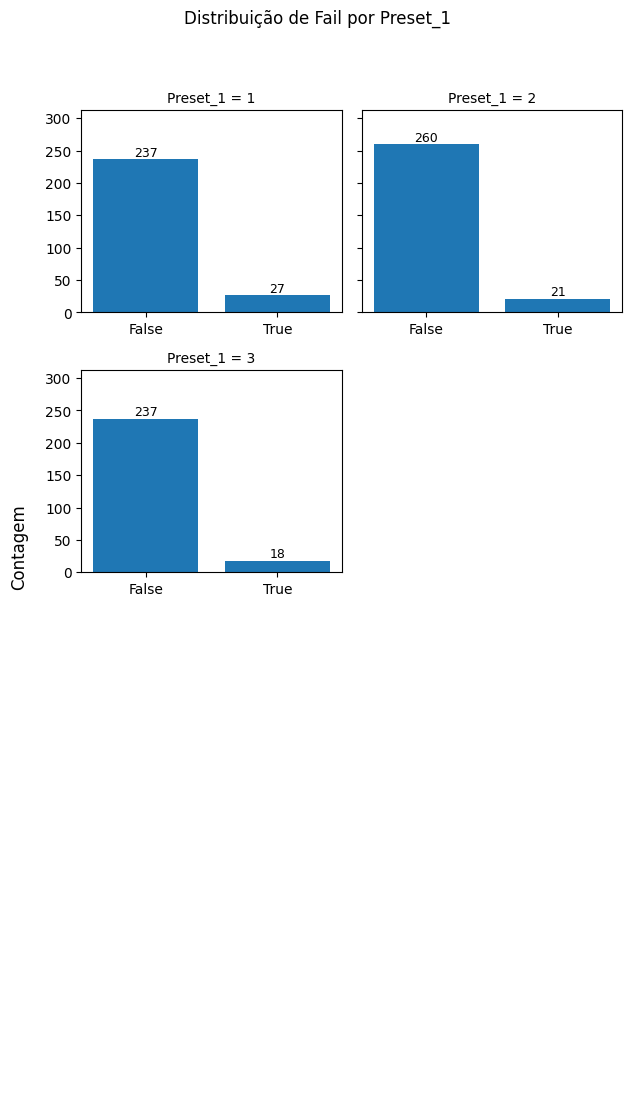

In [20]:
fig = plot_fail_by_preset1(df, rows=4, cols=2)
fig.show()

In [21]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_fail_by_preset1(df: pd.DataFrame, rows: int = 2, cols: int = 3,
                         title: str = "Distribuição de Fail por Preset_2"):
    # Seleção básica e limpeza mínima
    d = df[["Preset_2", "Fail"]].dropna()
    d["Fail"] = d["Fail"].replace({1: True, 0: False, "True": True, "False": False}).astype(bool)

    # Preparação: ordem dos presets e grade
    presets = np.sort(d["Preset_2"].unique())
    n = len(presets)
    if rows * cols < n:
        rows = math.ceil(n / cols)

    # Contagens por preset x fail (garante colunas [False, True])
    counts = (
        d.groupby(["Preset_2", "Fail"]).size()
         .unstack("Fail", fill_value=0)
         .reindex(columns=[False, True], fill_value=0)
    )
    y_max = int(counts.to_numpy().max())

    # Figura e eixos
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.2, rows * 2.8), sharey=True)
    axes = np.atleast_1d(axes).ravel()

    for i, p in enumerate(presets):
        ax = axes[i]
        vals = counts.loc[p].values  # [n_false, n_true]
        ax.bar(["False", "True"], vals)
        ax.set_ylim(0, round(y_max*1.2))
        ax.set_title(f"Preset_2 = {p}", fontsize=10)
        # rótulos de valor
        for x, y in zip([0, 1], vals):
            ax.text(x, y, str(y), ha="center", va="bottom", fontsize=9)

    # Esconde eixos sobrando
    for j in range(n, len(axes)):
        axes[j].axis("off")

    fig.suptitle(title, fontsize=12)
    fig.supylabel("Contagem")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    return fig

# Exemplo de uso:
# fig = plot_fail_by_preset1(df, rows=4, cols=2)
# plt.show()


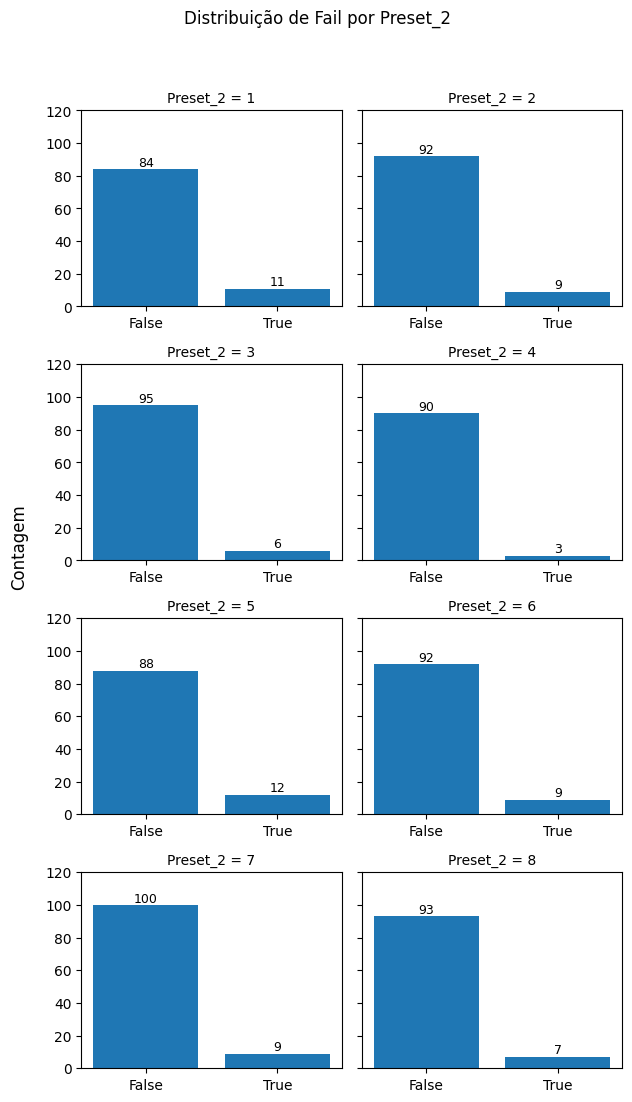

In [22]:
fig = plot_fail_by_preset1(df, rows=4, cols=2)
plt.show()

In [23]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_fail_by_preset1(df: pd.DataFrame, rows: int = 2, cols: int = 3,
                         title: str = "Distribuição de Fail por Preset_1_2"):
    # Seleção básica e limpeza mínima
    d = df[["Preset_1", "Preset_2", "Fail"]].dropna()
    d['Preset_1_2'] = (d['Preset_1'].astype(str) + d['Preset_2'].astype(str))
    d = d[["Preset_1_2", "Fail"]]
    d["Fail"] = d["Fail"].replace({1: True, 0: False, "True": True, "False": False}).astype(bool)

    # Preparação: ordem dos presets e grade
    presets = np.sort(d["Preset_1_2"].unique())
    n = len(presets)
    if rows * cols < n:
        rows = math.ceil(n / cols)

    # Contagens por preset x fail (garante colunas [False, True])
    counts = (
        d.groupby(["Preset_1_2", "Fail"]).size()
         .unstack("Fail", fill_value=0)
         .reindex(columns=[False, True], fill_value=0)
    )
    y_max = int(counts.to_numpy().max())

    # Figura e eixos
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.2, rows * 2.8), sharey=True)
    axes = np.atleast_1d(axes).ravel()

    for i, p in enumerate(presets):
        ax = axes[i]
        vals = counts.loc[p].values  # [n_false, n_true]
        ax.bar(["False", "True"], vals)
        ax.set_ylim(0, round(y_max*1.2))
        ax.set_title(f"Preset_1_2 = {p}", fontsize=10)
        # rótulos de valor
        for x, y in zip([0, 1], vals):
            ax.text(x, y, str(y), ha="center", va="bottom", fontsize=9)

    # Esconde eixos sobrando
    for j in range(n, len(axes)):
        axes[j].axis("off")

    fig.suptitle(title, fontsize=12)
    fig.supylabel("Contagem")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    return fig

# Exemplo de uso:
# fig = plot_fail_by_preset1(df, rows=4, cols=2)
# plt.show()


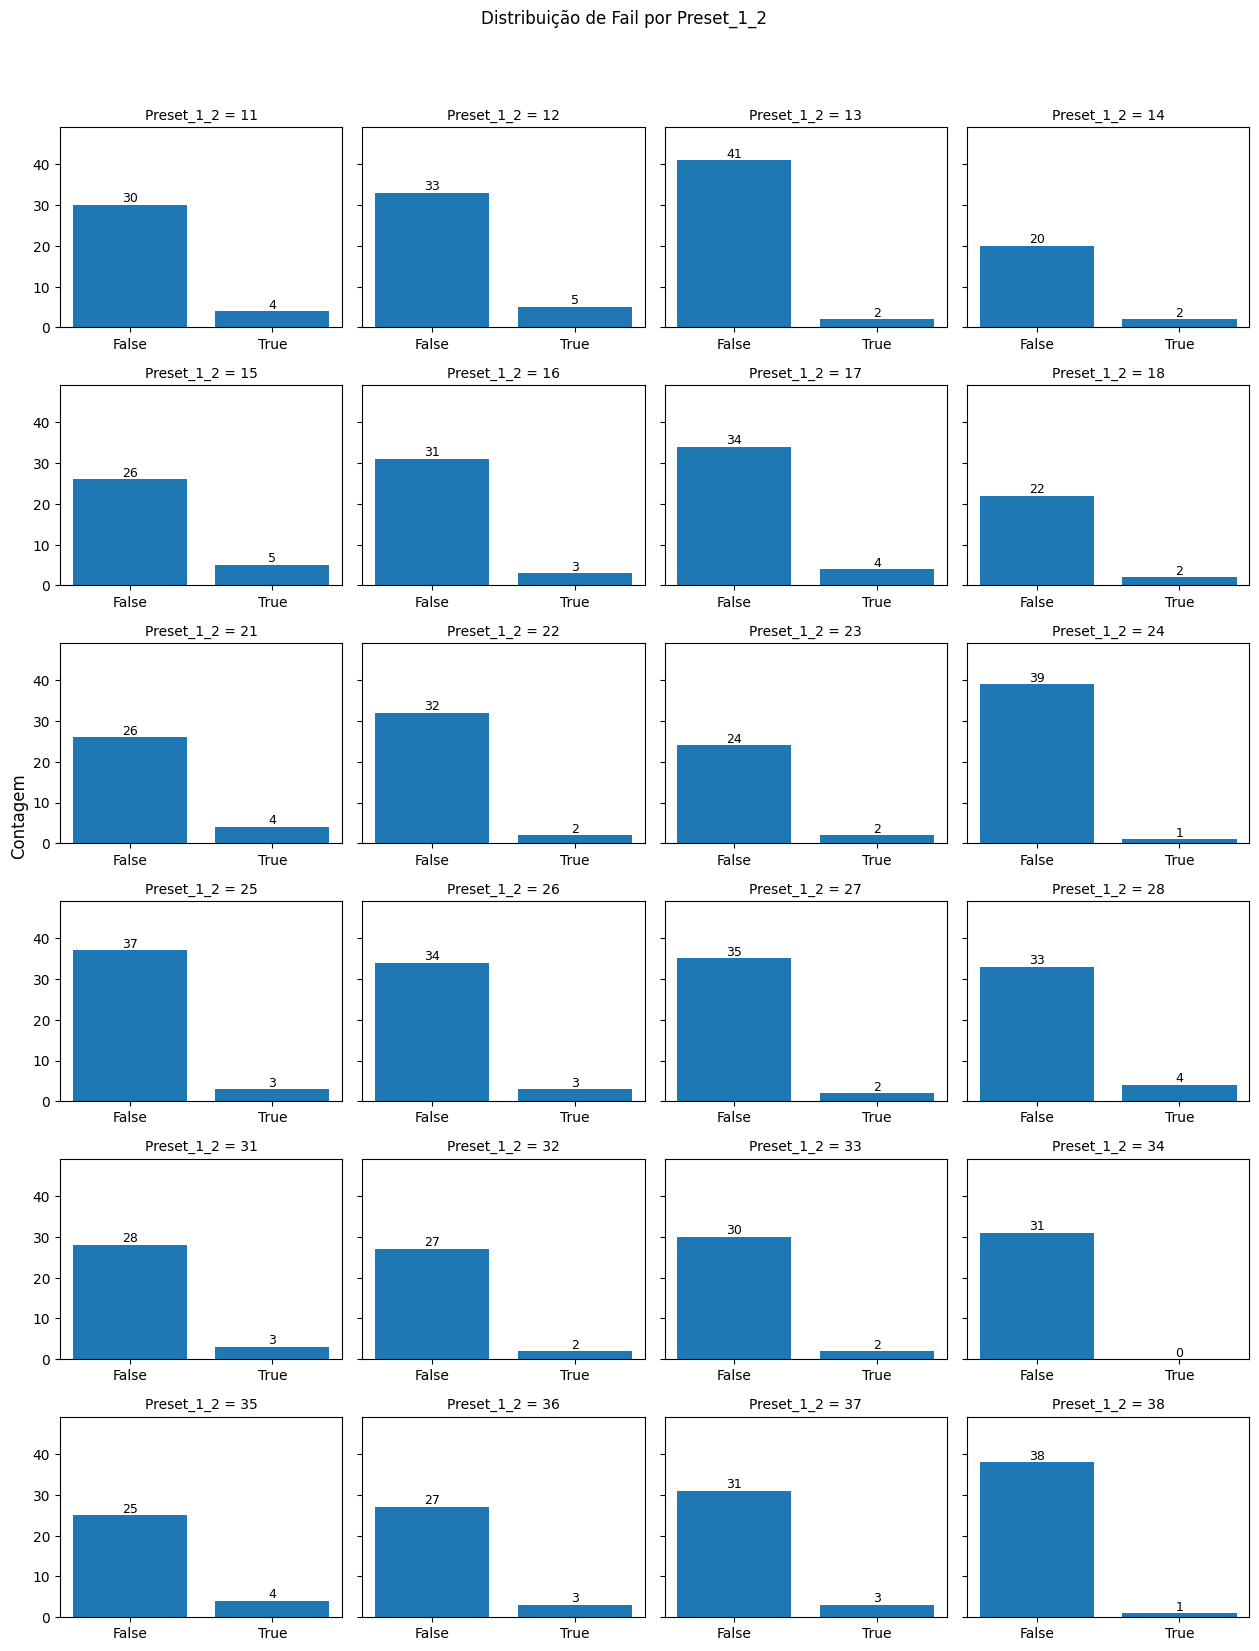

In [25]:
fig = plot_fail_by_preset1(df, rows=4, cols=4)
plt.show()

In [27]:
df['Preset_1_2'] = (df['Preset_1'].astype(str) + df['Preset_2'].astype(str))

In [30]:
df[(df['Preset_1']==1)&(df['Fail']==True)]

Cycle  Preset_1  Preset_2  Temperature    Pressure  VibrationX  \
12      13         1         1    79.806509  103.129738  120.753103   
162    163         1         2   105.969444  110.694610   89.139972   
163    164         1         5   105.695331  189.995681  102.272191   
164    165         1         5   105.275191  148.700443   69.876415   
262    263         1         8    90.295697   86.349374   75.924257   
263    264         1         8   115.278603  114.229505   85.462742   
415    416         1         6    76.867426   50.822002  101.404636   
416    417         1         2    80.356903   73.118922  149.395736   
417    418         1         2    81.546261   80.413020   88.977458   
418    419         1         7    79.538015   99.512446  119.314389   
419    420         1         7    79.546347   91.127475   79.626131   
422    423         1         7   100.207077  147.422493   89.904479   
423    424         1         3    99.962072  149.364202  140.368977   
424    425         1         1    99.666922  179.644437  158.556452   
428    429         1         7    52.005529  148.171041   50.590947   
429    430         1         1    48.091962  179.818867   20.120467   
430    431         1         2    48.171371   69.923414  161.188743   
431    432         1         5    50.962458   94.164260   89.448040   
539    540         1         5    74.742558  124.206736   71.564149   
549    550         1         6    71.337312   91.665516   88.503928   
550    551         1         3    99.209160  100.396379  100.605593   
552    553         1         5   119.625661  120.935931  120.814711   
709    710         1         2    88.748802  145.269712   89.354195   
792    793         1         6   127.670754  131.515898   95.582845   
793    794         1         1   127.241746  130.866581   94.530934   
796    797         1         4    49.985270  160.433640  110.953010   
797    798         1         4    79.777294  110.535405   61.334995   

     VibrationY  VibrationZ   Frequency  Fail Preset_1_2  
12   134.500905  115.873197   76.562856  True         11  
162  153.575928   90.299923  131.072244  True         12  
163  154.904461   99.773163  129.475094  True         15  
164  193.569947  119.136068  141.502855  True         15  
262  116.342009  100.129464  113.784334  True         18  
263   90.980967   73.479125   99.284994  True         18  
415  100.327893  200.242674   50.415427  True         16  
416   75.027844  149.767904   48.923777  True         12  
417  111.031598  129.166580  110.712088  True         12  
418  137.754901  149.189787  109.731930  True         17  
419  131.729198  110.214551  110.229684  True         17  
422  180.870524  157.083613   90.214276  True         17  
423   98.815562   91.700581   89.329631  True         13  
424  147.363816   91.494354   90.048673  True         11  
428  149.246393   50.799207  149.495691  True         17  
429  180.394562   20.522642  150.558790  True         11  
430   71.189361  160.239558   90.470580  True         12  
431   92.853324   89.845761  178.090303  True         15  
539  124.390554   70.677784  115.303604  True         15  
549  135.525440   89.955187  125.835585  True         16  
550  100.582224   99.463754  100.366913  True         13  
552  120.358059  118.796057  120.222977  True         15  
709  104.735625   80.537698   90.947445  True         12  
792  132.053899   97.254115   97.776491  True         16  
793  131.437235   97.778930  100.064043  True         11  
796  160.777175  109.917566  110.919290  True         14  
797  149.577811  129.463843   70.853353  True         14

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [10]:
df.dtypes

Cycle            int64
Preset_1         int64
Preset_2         int64
Temperature    float64
Pressure       float64
VibrationX     float64
VibrationY     float64
VibrationZ     float64
Frequency      float64
Fail              bool
dtype: object

In [8]:
profile.to_notebook_iframe()

In [7]:
df['Fail'].value_counts()

Fail
False    734
True      66
Name: count, dtype: int64

In [16]:
df[df['Fail']]

Cycle  Preset_1  Preset_2  Temperature    Pressure  VibrationX  \
12      13         1         1    79.806509  103.129738  120.753103   
156    157         3         1    91.695332   85.345796   99.890670   
157    158         2         5    88.916114   88.231887   85.140550   
158    159         3         5    88.768766   99.228691   89.109514   
162    163         1         2   105.969444  110.694610   89.139972   
..     ...       ...       ...          ...         ...         ...   
795    796         2         6    50.469522   98.235421  151.585252   
796    797         1         4    49.985270  160.433640  110.953010   
797    798         1         4    79.777294  110.535405   61.334995   
798    799         2         8    79.360314  159.985443   61.762879   
799    800         3         1    80.854011  110.543701  121.032227   

     VibrationY  VibrationZ   Frequency  Fail  
12   134.500905  115.873197   76.562856  True  
156   95.328429  124.970301   84.377355  True  
157  123.711911   88.852872  100.229131  True  
158  124.934221   84.306467   88.218162  True  
162  153.575928   90.299923  131.072244  True  
..          ...         ...         ...   ...  
795   99.341380  148.838481   49.841400  True  
796  160.777175  109.917566  110.919290  True  
797  149.577811  129.463843   70.853353  True  
798  169.773831  130.213426   80.113540  True  
799  131.719473   90.331155   71.261717  True  

[66 rows x 10 columns]